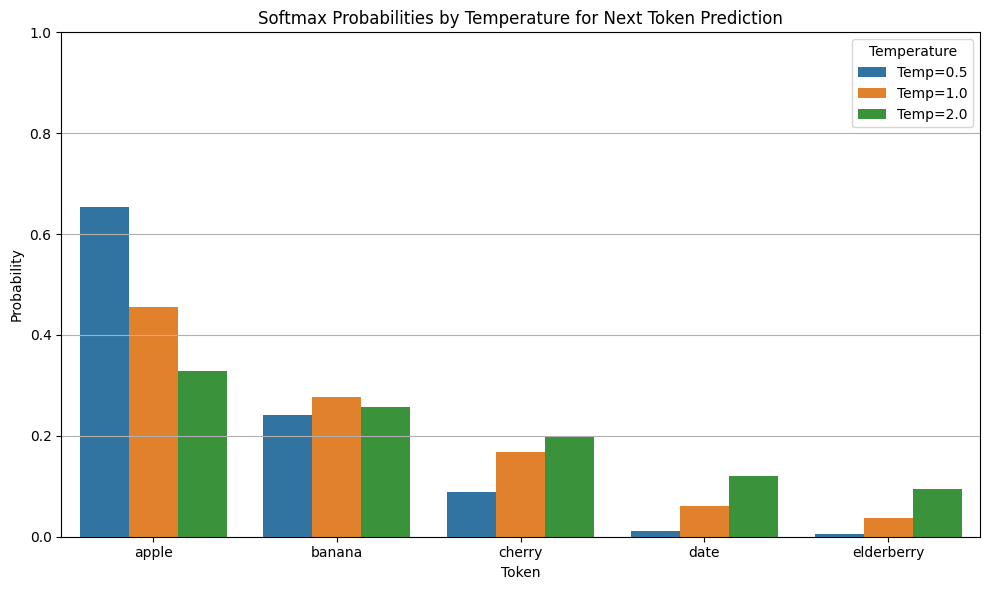

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 単語とその元のロジット（スコア）を定義
tokens = ["apple", "banana", "cherry", "date", "elderberry"]
logits = np.array([3.0, 2.5, 2.0, 1.0, 0.5])  # 仮のロジットスコア（高いほど選ばれやすい）

# temperatureの異なる設定でsoftmax確率を計算
temperatures = [0.5, 1.0, 2.0]
probability_distributions = {}

def softmax(logits, temperature):
    adjusted_logits = logits / temperature
    exp_logits = np.exp(adjusted_logits - np.max(adjusted_logits))  # 安定化
    return exp_logits / np.sum(exp_logits)

# 各temperatureに対してsoftmax確率を計算
for temp in temperatures:
    probs = softmax(logits, temp)
    probability_distributions[f"Temp={temp}"] = probs

# データフレームにまとめて可視化
df = pd.DataFrame(probability_distributions, index=tokens)
df = df.reset_index().melt(id_vars="index", var_name="Temperature", value_name="Probability")
df.rename(columns={"index": "Token"}, inplace=True)

# グラフを描画
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Token", y="Probability", hue="Temperature")
plt.title("Softmax Probabilities by Temperature for Next Token Prediction")
plt.ylabel("Probability")
plt.xlabel("Token")
plt.ylim(0, 1)
plt.legend(title="Temperature")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
